In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
import plotly as py 
import cufflinks as cf
from plotly.offline import iplot


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/Web Mining/SarcasmDetection/Competition 1-december/English_data'))

['train.En.csv', 'task_A_En_test.csv', '.ipynb_checkpoints', 'glove.6B.50d.txt', 'hos.h5', 'tokenizer_config.json', 'special_tokens_map.json', 'vocab.json', 'merges.txt', 'tokenizer.json', 'config.json', 'pytorch_model.bin']


# Data Exploratory

In [ ]:
input_folder = '/content/drive/MyDrive/Colab Notebooks/Web Mining/SarcasmDetection/Competition 1-december/English_data/train.En.csv'
df = pd.read_csv(input_folder)
df.head()

,Unnamed: 0,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0
1,1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0
2,2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0
3,3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0
4,4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print('Shape of data => ', df.shape)

Shape of data =>  (3468, 10)


In [ ]:
df.groupby('satire').count()

,Unnamed: 0,tweet,sarcastic,rephrase,sarcasm,irony,understatement,overstatement,rhetorical_question
satire,,,,,,,,,
0.0,842,842,842,842,842,842,842,842,842
1.0,25,25,25,25,25,25,25,25,25


In [ ]:
data = df[['tweet', 'sarcastic']]
data.head()

,tweet,sarcastic
0,The only thing I got from college is a caffein...,1
1,I love it when professors draw a big question ...,1
2,Remember the hundred emails from companies whe...,1
3,Today my pop-pop told me I was not “forced” to...,1
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1


In [ ]:
data

,tweet,sarcastic
0,The only thing I got from college is a caffein...,1
1,I love it when professors draw a big question ...,1
2,Remember the hundred emails from companies whe...,1
3,Today my pop-pop told me I was not “forced” to...,1
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1
...,...,...
3463,The population spike in Chicago in 9 months is...,0
3464,You'd think in the second to last English clas...,0
3465,I’m finally surfacing after a holiday to Scotl...,0
3466,Couldn't be prouder today. Well done to every ...,0


In [ ]:
data.tail()

,tweet,sarcastic
3463,The population spike in Chicago in 9 months is...,0
3464,You'd think in the second to last English clas...,0
3465,I’m finally surfacing after a holiday to Scotl...,0
3466,Couldn't be prouder today. Well done to every ...,0
3467,Overheard as my 13 year old games with a frien...,0


## Testing Data

In [ ]:
input_folder = '/content/drive/MyDrive/Colab Notebooks/Web Mining/SarcasmDetection/Competition 1-december/English_data/task_A_En_test.csv'
test_data = pd.read_csv(input_folder, names=['tweet', 'sarcastic'], header=0)

print('Shape of data => ', test_data.shape)
test_data['sarcastic'].value_counts()

Shape of data =>  (1400, 2)


0    1200
1     200
Name: sarcastic, dtype: int64

In [ ]:
test_data.head()

,tweet,sarcastic
0,"Size on the the Toulouse team, That pack is mo...",0
1,Pinball!,0
2,So the Scottish Government want people to get ...,1
3,villainous pro tip : change the device name on...,0
4,I would date any of these men 🥺,0


## Drop null tweets

In [ ]:
print(data.isnull().sum())
print(test_data.isnull().sum())

tweet        1
sarcastic    0
dtype: int64
tweet        0
sarcastic    0
dtype: int64


In [ ]:
print(data[data['tweet'].isnull()])
data.dropna(inplace=True)
print('Shape of data => ', data.shape)

     tweet  sarcastic
1062   NaN          0
Shape of data =>  (3467, 2)


In [ ]:
print(data.isnull().sum())

tweet        0
sarcastic    0
dtype: int64


In [ ]:
data.groupby('sarcastic').count()

,tweet
sarcastic,
0,2600
1,867


In [ ]:
test_data.groupby('sarcastic').count()

,tweet
sarcastic,
0,1200
1,200


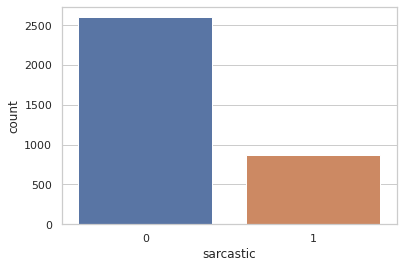

In [ ]:
sns.set_theme(style='whitegrid')
sns.countplot(data=data, x='sarcastic')

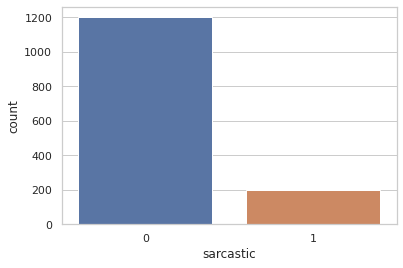

In [ ]:
sns.set_theme(style='whitegrid')
sns.countplot(data=test_data, x='sarcastic')

In [ ]:
867 / (2600 + 867)

0.2500721084511105

In [ ]:
data['tweet_length'] = data['tweet'].apply(lambda x:len(x.split()))
data['tweet_length'].head()

0    11
1    26
2    36
3    17
4    29
Name: tweet_length, dtype: int64

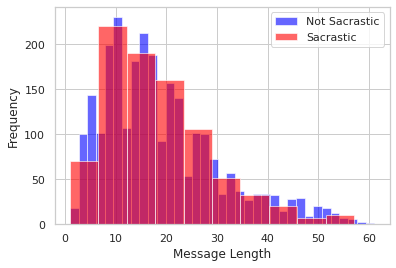

In [ ]:
# plt.figure(figsize=(12, 8))

data[data['sarcastic'] == 0]['tweet_length'].plot(bins=35, kind='hist', color='blue', 
                                       label='Not Sacrastic', alpha=0.6)
data[data['sarcastic'] == 1]['tweet_length'].plot(kind='hist', color='red', 
                                       label='Sacrastic', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")
plt.show()

In [ ]:
data.groupby('sarcastic').mean()

,tweet_length
sarcastic,
0,19.012308
1,18.296424


In [ ]:
# The first 5 tweets
for index, tweet in enumerate(data['tweet'][:5]):
  print(f'Tweet {index + 1}:\n  {tweet}')

Tweet 1:
  The only thing I got from college is a caffeine addiction
Tweet 2:
  I love it when professors draw a big question mark next to my answer on an exam because I’m always like yeah I don’t either ¯\_(ツ)_/¯
Tweet 3:
  Remember the hundred emails from companies when Covid started getting real? I’ve gotten three in regards to support for protests. And only @SavageXFenty shared helpful links and actually said black lives matter... we love capitalism 🥰🙌🏼
Tweet 4:
  Today my pop-pop told me I was not “forced” to go to college 🙃 okay sure sureeee
Tweet 5:
  @VolphanCarol @littlewhitty @mysticalmanatee I did too, and I also reported Cancun Cruz not worrying about the heartbeats of his constituents without electricity or heat when he fled to Mexico.


In [ ]:
data['tweet'].tolist()[0:10]

['The only thing I got from college is a caffeine addiction',
 'I love it when professors draw a big question mark next to my answer on an exam because I’m always like yeah I don’t either ¯\\_(ツ)_/¯',
 'Remember the hundred emails from companies when Covid started getting real? I’ve gotten three in regards to support for protests. And only @SavageXFenty shared helpful links and actually said black lives matter... we love capitalism 🥰🙌🏼',
 'Today my pop-pop told me I was not “forced” to go to college 🙃 okay sure sureeee',
 '@VolphanCarol @littlewhitty @mysticalmanatee I did too, and I also reported Cancun Cruz not worrying about the heartbeats of his constituents without electricity or heat when he fled to Mexico.',
 '@jimrossignol I choose to interpret it as "XD": the universal emoticon for laughing at those poor, poor folks in Ubisoft\'s marketing department who have to deal with that branding until the servers quietly shut down 8 months after launch.',
 "Why would Alexa's recipe for 

## Expand Contractions

In [ ]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "i'd": "i would", "i'd've": "i would have","i'll": "i will",
                     "i'll've": "i will have","i'm": "i am","i've": "i have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Train Data
data['cleaned_tweet'] = data['tweet'].str.replace('’', '\'')
# Lowercase the tweets
data['cleaned_tweet'] = data['cleaned_tweet'].apply(lambda x: x.lower())
# Expanding Contractions in the reviews
data['cleaned_tweet'] = data['cleaned_tweet'].apply(lambda x:expand_contractions(x))

# Test Data
test_data['cleaned_tweet'] = test_data['tweet'].str.replace('’', '\'')
# Lowercase the tweets
test_data['cleaned_tweet'] = test_data['cleaned_tweet'].apply(lambda x: x.lower())
# Expanding Contractions in the reviews
test_data['cleaned_tweet'] = test_data['cleaned_tweet'].apply(lambda x:expand_contractions(x))


In [ ]:
# The first 10 tweets
data['cleaned_tweet'].tolist()[0:10]

['the only thing i got from college is a caffeine addiction',
 'i love it when professors draw a big question mark next to my answer on an exam because i am always like yeah i do not either ¯\\_(ツ)_/¯',
 'remember the hundred emails from companies when covid started getting real? i have gotten three in regards to support for protests. and only @savagexfenty shared helpful links and actually said black lives matter... we love capitalism 🥰🙌🏼',
 'today my pop-pop told me i was not “forced” to go to college 🙃 okay sure sureeee',
 '@volphancarol @littlewhitty @mysticalmanatee i did too, and i also reported cancun cruz not worrying about the heartbeats of his constituents without electricity or heat when he fled to mexico.',
 '@jimrossignol i choose to interpret it as "xd": the universal emoticon for laughing at those poor, poor folks in ubisoft is marketing department who have to deal with that branding until the servers quietly shut down 8 months after launch.',
 'why would alexa is recipe

In [ ]:
#The first 10 tweets
test_data['cleaned_tweet'].tolist()[0:10]

['size on the the toulouse team, that pack is monstrous. \n\ni cannot see a welsh region ever winning this, money talks as they say .',
 'pinball!',
 'so the scottish government want people to get their booster shots so badly that the website does not even work',
 'villainous pro tip : change the device name on her bluetooth devices so she does not forget u',
 'i would date any of these men 🥺',
 'if there is one fictional place i could go, christmas at hogwarts would be that place',
 'i mean, it is a great cause they are doing it for, but can we not have new xmas music that is... well... good?!',
 'where did they get 1.22xg from without the pen?!',
 'there was so much interest in your venice series peg, the hand colouring is exquisite!👌🏽👏🏽👍🏽',
 'sometimes i lay in bed and think about how today will be the day i make my life better. exercise, drinking water, eating healthy. then i wake up. ']

In [ ]:
data.head()

,tweet,sarcastic,tweet_length,cleaned_tweet
0,The only thing I got from college is a caffein...,1,11,the only thing i got from college is a caffein...
1,I love it when professors draw a big question ...,1,26,i love it when professors draw a big question ...
2,Remember the hundred emails from companies whe...,1,36,remember the hundred emails from companies whe...
3,Today my pop-pop told me I was not “forced” to...,1,17,today my pop-pop told me i was not “forced” to...
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,29,@volphancarol @littlewhitty @mysticalmanatee i...


## Remove digits / mentions / hashtags ...

In [ ]:
pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 KB 3.9 MB/s eta 0:00:00


In [ ]:
from nltk.tokenize import word_tokenize
import string
import re
import demoji


def clean_tweet(text):
    # To remove unicode characters
    text=demoji.replace_with_desc(text)
    text = text.encode("ascii", "ignore")  #encode() method
    text = text.decode()                   #decode() method
    # Rwmove mentions
    text = re.sub("@[A-Za-z0-9_]+","", text)
    # Remove hashtags
    text = re.sub("#[A-Za-z0-9_]+","", text)
    # Remove digits
    text = re.sub(r"\d","",text)      
    # Remove non-ascii
    text = re.sub(r'[^\x00-\x7f]',r' ',text) 
    # Remove punctuation
    text = re.sub(r'[^\w\s]','',text) 
    # Remove http URLs
    text = re.sub(r'http\S+|www.\S+', '', text) 
    # Remove special characters
    text = re.sub('[^A-Za-z0-9]+', " ", text)  
    
    return text

data['cleaned_tweet'] = data['cleaned_tweet'].apply(lambda x: clean_tweet(x))
test_data['cleaned_tweet'] = test_data['cleaned_tweet'].apply(lambda x: clean_tweet(x))

In [ ]:
t1 = 'I think France will win #Euro2016. Predict who will flop and come out on top at https://t.co/U8ycyIk3JK https://t.co/PGTRXBNSLY'
t2 = '@AgainstArms @ACCLiverpool Yes NEU! 👏👏👏'
t3 = 'Off to london today for the Aurora Programme! See all you girl bosses there! 💁🏽\u200d♀️💕 #Iamaurora'
t4 = '@GeekDadGamer My neice (4 or 5 at the time) *loved* playing Mario Kart 8 with her dad using the acceleration and steering assists. Before that she was mostly a spectator while he played kid-friendly games like Ape Escape.'
t5= '@JacobWohlReport Do I need to aquire a wife be'
clean_tweet(t5)


' Do I need to aquire a wife be'

In [ ]:
data['cleaned_tweet'].tolist()[0:10]

['the only thing i got from college is a caffeine addiction',
 'i love it when professors draw a big question mark next to my answer on an exam because i am always like yeah i do not either ',
 'remember the hundred emails from companies when covid started getting real i have gotten three in regards to support for protests and only shared helpful links and actually said black lives matter we love capitalism smiling face with heartsraising hands mediumlight skin tone',
 'today my poppop told me i was not forced to go to college upsidedown face okay sure sureeee',
 ' i did too and i also reported cancun cruz not worrying about the heartbeats of his constituents without electricity or heat when he fled to mexico',
 ' i choose to interpret it as xd the universal emoticon for laughing at those poor poor folks in ubisoft is marketing department who have to deal with that branding until the servers quietly shut down months after launch',
 'why would alexa is recipe for yorkshire pudding be a 

## Stopords Removal & Lemmatization

In [ ]:
import numpy as np 
import pandas as pd 
import os
#import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
import spacy

In [ ]:
tqdm.pandas()
spacy_eng = spacy.load("en_core_web_sm")
nltk.download('stopwords')
lemm = WordNetLemmatizer()
#init_notebook_mode(connected=True)
sns.set_style("darkgrid")
#plt.rcParams['figure.figsize'] = (20,8)
#plt.rcParams['font.size'] = 18
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')
stop_words.remove('not')

def stop_lemm(x):
    
    headline = re.sub('\s+\n+', ' ', str(x))
    headline = re.sub('[^a-zA-Z0-9]', ' ', str(x))
    headline = headline.lower()
    headline = headline.split()
    
    headline = [lemm.lemmatize(word, "v") for word in headline if not word in stop_words]
    headline = ' '.join(headline)
    
    return headline

In [ ]:
data['cleaned_tweet'] = data['cleaned_tweet'].apply(lambda x: stop_lemm(x))
test_data['cleaned_tweet'] = test_data['cleaned_tweet'].apply(lambda x: stop_lemm(x))

In [ ]:
data

,tweet,sarcastic,tweet_length,cleaned_tweet
0,The only thing I got from college is a caffein...,1,11,thing get college caffeine addiction
1,I love it when professors draw a big question ...,1,26,love professors draw big question mark next an...
2,Remember the hundred emails from companies whe...,1,36,remember hundred email company covid start get...
3,Today my pop-pop told me I was not “forced” to...,1,17,today poppop tell not force go college upsided...
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,29,also report cancun cruz not worry heartbeats c...
...,...,...,...,...
3463,The population spike in Chicago in 9 months is...,0,13,population spike chicago months ridiculous
3464,You'd think in the second to last English clas...,0,19,would think second last english class year pro...
3465,I’m finally surfacing after a holiday to Scotl...,0,46,finally surface holiday scotland difficult day...
3466,Couldn't be prouder today. Well done to every ...,0,38,could not prouder today well do every student ...


In [ ]:
#data['cleaned_tweet'].tolist()[0:2]
# ['thing get college caffeine addiction',
#  'love professor draw big question mark answer exam like yeah',

In [ ]:
data.to_csv('./cleaned_train_data')
test_data.to_csv('./cleaned_test_data')

In [ ]:
data

,tweet,sarcastic,tweet_length,cleaned_tweet
0,The only thing I got from college is a caffein...,1,11,thing get college caffeine addiction
1,I love it when professors draw a big question ...,1,26,love professors draw big question mark next an...
2,Remember the hundred emails from companies whe...,1,36,remember hundred email company covid start get...
3,Today my pop-pop told me I was not “forced” to...,1,17,today poppop tell not force go college upsided...
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,29,also report cancun cruz not worry heartbeats c...
...,...,...,...,...
3463,The population spike in Chicago in 9 months is...,0,13,population spike chicago months ridiculous
3464,You'd think in the second to last English clas...,0,19,would think second last english class year pro...
3465,I’m finally surfacing after a holiday to Scotl...,0,46,finally surface holiday scotland difficult day...
3466,Couldn't be prouder today. Well done to every ...,0,38,could not prouder today well do every student ...


## Word2Vec Embedding

In [ ]:
import gensim
import gensim.downloader as api

list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [ ]:
# wv_twitter_25 = api.load('glove-twitter-25')
# wv_twitter_50 = api.load('glove-twitter-50')
# wv_twitter_100 = api.load('glove-twitter-100')
wv_twitter_200 = api.load('glove-twitter-200')

[=================================================-] 99.7% 756.5/758.5MB downloaded


In [ ]:
# wv_twitter_200.save('./content/drive/MyDrive/embeddings/glove-twitter-200.kv')

In [ ]:
# !pip install kivy

In [ ]:
# import kivy
# from kivy.lang import Builder

#wv_twitter_200 = Builder.load_file('./content/drive/MyDrive/embeddings/glove-twitter-200.kv.vectors.npy')

In [ ]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import string
import numpy as np

In [ ]:
vocabs = ["one",'two','man','woman','table']

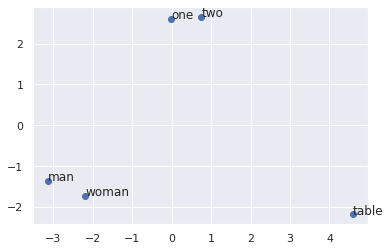

In [ ]:
embedded_vocab = [wv_twitter_200[vocab] for vocab in vocabs]
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_vocabs = pca.fit_transform(embedded_vocab)

plt.scatter(pca_vocabs[:, 0], pca_vocabs[:, 1])

for i, word in enumerate(vocabs):
    plt.annotate(word, xy=(pca_vocabs[i, 0], pca_vocabs[i, 1]))
plt.show()

In [ ]:
embedded_vocab=np.array(embedded_vocab)

In [ ]:
embedded_vocab.shape

(5, 200)

# Vectorize Train/Test Datasets

In [ ]:
vocab_size=0

In [ ]:
def sentence_vector(sent, wv,max_len=15):
  global vocab_size
  sent=sent.split()
  
  
  wv_sent = np.zeros((max_len,200))
  tokens_count = 1



  for i,word in enumerate(sent):
    
    if word in wv and i<max_len:
      tokens_count += 1
      wv_sent[i]=wv[word]

      vocab_size += 1
    
  #wv_sent = wv_sent / tokens_count

  return wv_sent.flatten()

In [ ]:
data['tweet_vec'] = data['cleaned_tweet'].apply(lambda x: sentence_vector(x, wv=wv_twitter_200))
test_data['tweet_vec'] = test_data['cleaned_tweet'].apply(lambda x: sentence_vector(x, wv=wv_twitter_200))




In [ ]:
print(vocab_size)

43388


In [ ]:
np.array(data['tweet_vec'].tolist()[:2]).shape

(2, 3000)

In [ ]:
print('Shape of train data => ', np.stack(np.array(data['tweet_vec'])).shape)
print('Shape of test data => ', np.stack(np.array(data['tweet_vec'])).shape)

Shape of train data =>  (3467, 3000)
Shape of test data =>  (3467, 3000)


In [ ]:
X_train = np.array(data['tweet_vec'].tolist())
y_train = np.array(data['sarcastic'].tolist())

X_test = np.array(test_data['tweet_vec'].tolist())
y_test = np.array(test_data['sarcastic'].tolist())

print(f'X shape     : {X_train.shape}')
print(f'y shape     : {y_train.shape}\n')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X shape     : (3467, 3000)
y shape     : (3467,)

X_test shape: (1400, 3000)
y_test shape: (1400,)


**LDA**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
clf_train = LDA()
clf_test  = LDA()
train=clf_train.fit_transform(X_train, y_train)
test =clf_test.fit_transform(X_test, y_test)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
plt.scatter(test,y_test,c=y_test)

# How you can apply TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# List of documents
documents = ['This is the first document.',
             'This document is the second document.',
             'And this is the third one.',
             'Is this the first document?']

# Create the TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Calculate the TF-IDF scores for each document
tfidf_scores = vectorizer.fit_transform(documents)




# Model Building

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(train,y_train)

In [ ]:
from sklearn.metrics import classification_report


predicted = classifier.predict(test)
target_names = ['not sarcastic', 'sarcastic']

print(classification_report(y_test, predicted, target_names=target_names))


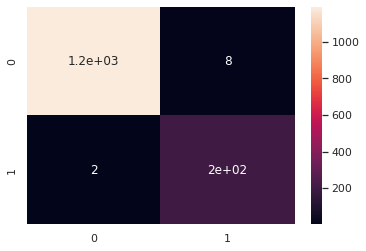

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted)  
sns.heatmap(cm, annot=True)

error analysis

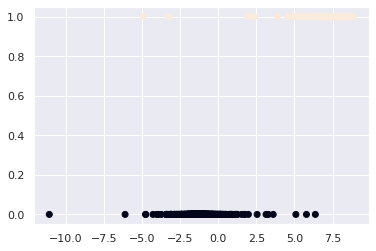

In [ ]:
plt.scatter(test,y_test,c=y_test)

In [ ]:
for i,item in enumerate(test):
  pred=classifier.predict([item])
  if pred!=y_test[i]:
    print(pred,test_data['tweet'].tolist()[i])
    print(test_data['cleaned_tweet'].tolist()[i])
    print(item)


[1] Some good work in here .
good work
[5.49421351]
[0] my life is great lmaooooo.                
life great lmaooooo
[-5.18065683]
[1] I am so in love with this woman
love woman
[3.78729785]
[1] Boris last Christmas at a party:
boris last christmas party
[1.60613691]
[1] Sadly, I think he will need it
sadly think need
[2.25957286]
[1] You are looking wonderful for your age.
look wonderful age
[2.15432883]
[0] Sure you do! Doesn't everyone?! I do it everyday!!!
sure not everyone everyday
[1.34580564]
[1] Imagine Bawheid lying !!
imagine bawheid lie
[1.80279151]
[1] I love my friends
love friends
[5.31091587]
[1] At least they looked nice at the time
least look nice time
[3.29206954]
[1] Mannnnnnn , ain’t nothing like it
mannnnnnn not nothing like
[4.16655155]
[1] someone teach me
someone teach
[3.13642839]
[1] I’m a simp for the Hive, y’all.
simp hive
[2.21633921]
[0] love when my boss micromanaged me (:
love boss micromanaged smile
[1.25929216]
[1] Just what does a man have to do to 

XGBoost

In [ ]:
import time
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
clf=xgb.XGBClassifier()

param_grid = {
        'learning_rate': [ 0.01, 0.1, 0.5, 1,5,10],
        'gamma': [0.1, 0, 0.25, 0.5, 1.0,5.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [10,20,30,40,50]}


rs_clf = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=30)
rs_clf.fit(train, y_train)
 
# Identify optimal hyperparameter values
best_n_estim= rs_clf.best_params_['n_estimators']
print("The best parameters: {}".format(rs_clf.best_params_))

The best parameters: {'reg_lambda': 5.0, 'n_estimators': 20, 'learning_rate': 0.5, 'gamma': 0.25}


In [ ]:

xgb_classifier = xgb.XGBClassifier(reg_lambda= 5.0, n_estimators= 20, learning_rate=0.5, gamma=0.25)
xgb_classifier.fit(train, y_train)
xgb_predictions = xgb_classifier.predict(test)
 
print (classification_report(y_test, xgb_predictions))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1200
           1       0.95      0.99      0.97       200

    accuracy                           0.99      1400
   macro avg       0.97      0.99      0.98      1400
weighted avg       0.99      0.99      0.99      1400



In [ ]:
from joblib import dump, load

# Save the model to a file
#dump(classifier, '/content/drive/MyDrive/Colab Notebooks/Web Mining/SarcasmDetection/Competition 1-december/saved_models/model.joblib')

# Load the model from the file
loaded_model = load('/content/drive/MyDrive/Colab Notebooks/Web Mining/SarcasmDetection/Competition 1-december/saved_models/model.joblib')


In [ ]:
from sklearn.metrics import classification_report


predicted = loaded_model.predict(test)
target_names = ['not sarcastic', 'sarcastic']

print(classification_report(y_test, predicted, target_names=target_names))

               precision    recall  f1-score   support

not sarcastic       1.00      0.99      0.99      1200
    sarcastic       0.95      0.99      0.97       200

     accuracy                           0.99      1400
    macro avg       0.97      0.99      0.98      1400
 weighted avg       0.99      0.99      0.99      1400



SVM

In [ ]:
from sklearn import svm



# Create the SVM model
model = svm.SVC(kernel='linear')

model.fit(train,y_train)


SVC(kernel='linear')

In [ ]:
from sklearn.metrics import classification_report


predicted = model.predict(test)
target_names = ['not sarcastic', 'sarcastic']

print(classification_report(y_test, predicted, target_names=target_names))

               precision    recall  f1-score   support

not sarcastic       1.00      0.99      0.99      1200
    sarcastic       0.95      0.99      0.97       200

     accuracy                           0.99      1400
    macro avg       0.97      0.99      0.98      1400
 weighted avg       0.99      0.99      0.99      1400



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

#1. creating a GradientBoosting model object
clf = GradientBoostingClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(train, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1200
           1       0.94      0.99      0.97       200

    accuracy                           0.99      1400
   macro avg       0.97      0.99      0.98      1400
weighted avg       0.99      0.99      0.99      1400



Text(66.5, 0.5, 'Truth')

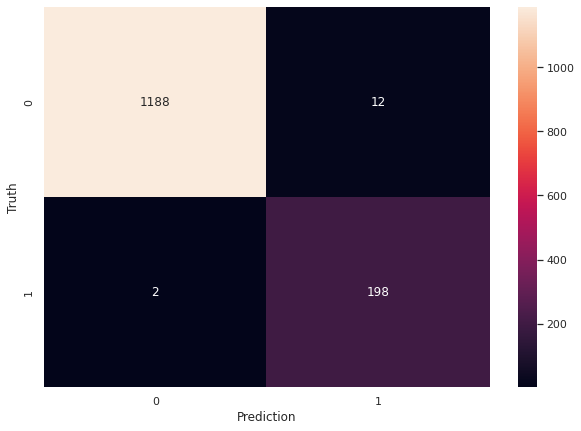

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')